#Importing Libraries and Dataset

In [ ]:
%pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
od.download("https://www.kaggle.com/datasets/rajeshrampure/zomato-dataset/data")

Skipping, found downloaded files in "./zomato-dataset" (use force=True to force download)


In [ ]:
# read the dataset
df = pd.read_csv("zomato-dataset/zomato.csv")

#Data Overview

In [ ]:
# show the numbers of rows and columns of the dataset
df.shape

(51717, 17)

In [ ]:
# first 5 rows of the dataset
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.nunique()

,0
url,51717
address,11495
name,8792
online_order,2
book_table,2
rate,64
votes,2328
phone,14926
location,93
rest_type,93


In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


In [ ]:
# statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
votes,51717.0,283.697527,803.838853,0.0,7.0,41.0,198.0,16832.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

#Cleaning and Manipulating Data

In [ ]:
# dropping several columns that won't be used
df.drop(axis=1, columns=["url", "address", "phone", "dish_liked", "reviews_list", "location", "menu_item"], inplace=True)
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [ ]:
# renaming columns
df.rename(columns={"name":"restaurant_name", "rate":"rating", "rest_type":"restaurant_type", "approx_cost(for two people)":"cost_for_two",
                    "listed_in(type)":"service_type", "listed_in(city)":"location" }, inplace=True)
df.head()

,restaurant_name,online_order,book_table,rating,votes,restaurant_type,cuisines,cost_for_two,service_type,location
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [ ]:
df.isnull().sum()

,0
restaurant_name,0
online_order,0
book_table,0
rating,7775
votes,0
restaurant_type,227
cuisines,45
cost_for_two,346
service_type,0
location,0


In [ ]:
df['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
# remove specific unwanted characters and extra spaces from the 'rating' column
remove_char = ["NEW", "/5", " /5", "-"]
for i in remove_char:
    df['rating'] = df['rating'].str.replace(i, "")
    df['rating'] = df['rating'].str.strip()

# display unique values in the 'rating' column to check the results
df['rating'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [ ]:
# Convert the 'rating' column to numeric values, setting errors to 'coerce' to handle any non-numeric values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [ ]:
# fill the NaN value with mean of the rating
df['rating'] = df['rating'].fillna(df['rating'].mean())

In [ ]:
df['cost_for_two'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [ ]:
# remove commas from the 'cost_for_two' column and convert it to float type
df["cost_for_two"] = df["cost_for_two"].str.replace(",", "").astype(float)

In [ ]:
# fill the NaN value with mean of the cost_for_two
df['cost_for_two'] = df['cost_for_two'].fillna(df['cost_for_two'].mean())

#Exploratory Data Analysis and Data Visualization

##Number of Restaurant in Each City

<ipython-input-117-c66197047662>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='City', x='Count', data=counts, width=0.9, palette="light:b_r")


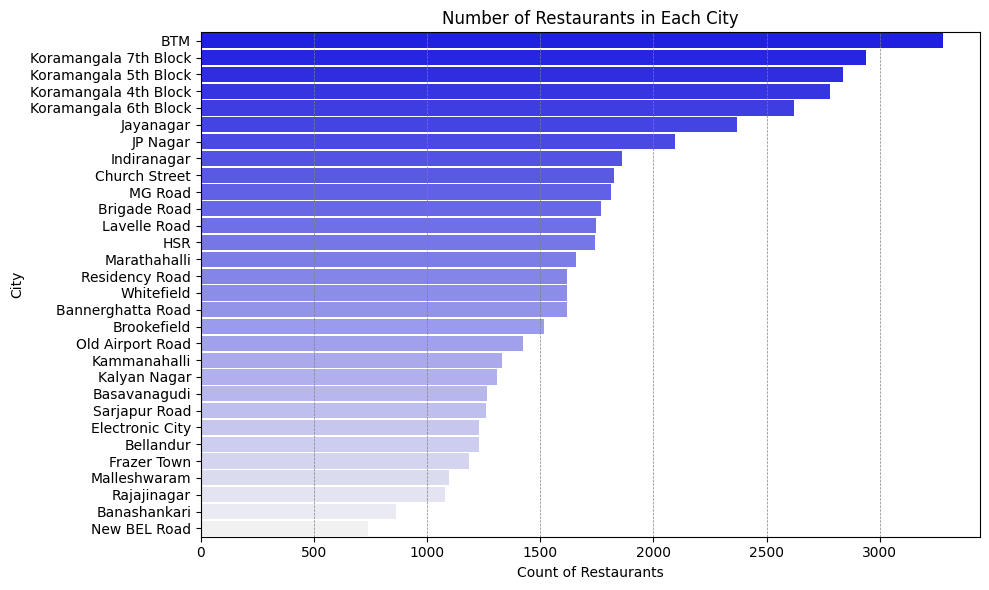

In [ ]:
# Calculate the number of restaurants in each city and create a horizontal barplot
counts = df['location'].value_counts().reset_index()  # Count occurrences of each city
counts.columns = ['City', 'Count']  # Rename columns for clarity

# Create a horizontal barplot showing the number of restaurants in each city
plt.figure(figsize=(10, 6))
sns.barplot(y='City', x='Count', data=counts, width=0.9, palette="light:b_r")

# Add labels, title, and adjust grid and layout
plt.xlabel('Count of Restaurants')
plt.ylabel('City')
plt.title('Number of Restaurants in Each City')
plt.grid(color='grey', linestyle='--', linewidth=0.5, axis='x', zorder=0)
plt.tight_layout()
plt.show()

##Availability of Online Delivery at Restaurants


In [ ]:
df["online_order"].value_counts()

,count
online_order,
Yes,30444
No,21273


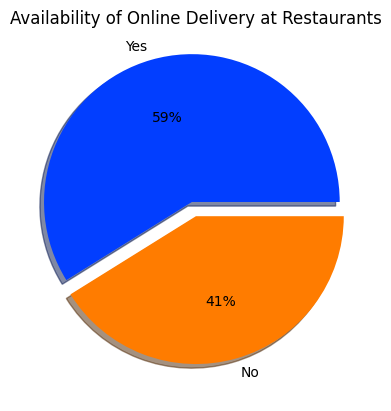

In [ ]:
# Create a pie chart showing the availability of online delivery at restaurants
online_order_counts = df['online_order'].value_counts()  # Count occurrences of each online order status
labels = online_order_counts.index  # Get labels for pie slices
myexplode = [0.1, 0]  # Highlight the 'Yes' slice by exploding it slightly
colors = sns.color_palette('bright')  # Define colors for the pie chart

plt.pie(online_order_counts, labels=labels, explode=myexplode, colors=colors, shadow=True, autopct='%.0f%%')  # Create the pie chart with specified parameters
plt.title('Availability of Online Delivery at Restaurants')  # Add title
plt.show()  # Display the pie chart

###Top 10 Cities with the Highest Number of Restaurants Offering Online Ordering

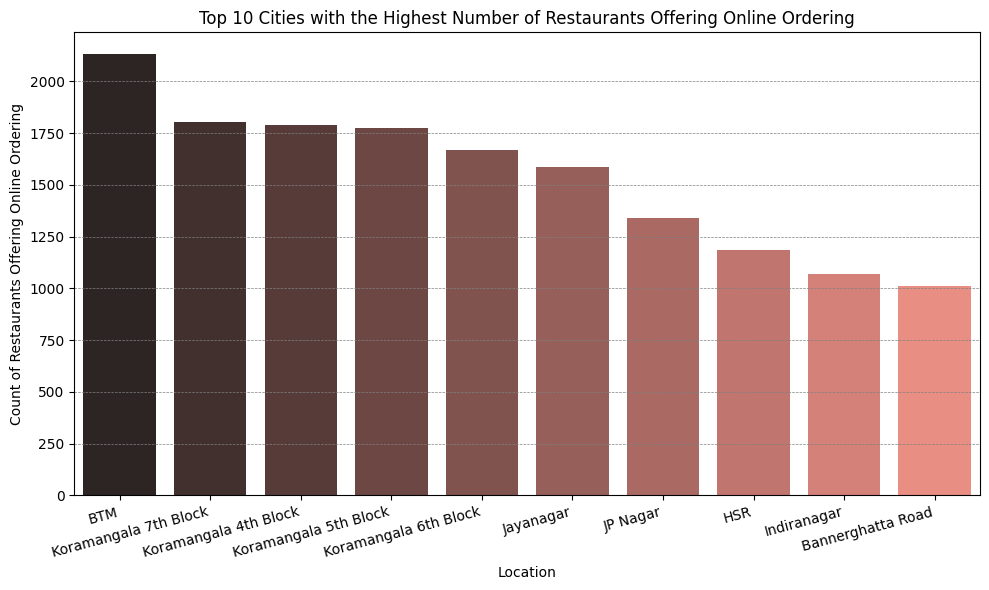

In [ ]:
# Calculate the count of restaurants offering online ordering by location and select the top 10 cities
online_order = df.groupby(['location', 'online_order']).size().reset_index(name='online_order_count')  # Group by location and online ordering status, then count occurrences
online_order_yes = online_order[online_order['online_order'] == 'Yes']  # Filter for locations where online ordering is available
online_order_yes = online_order_yes.sort_values(by='online_order_count', ascending=False).head(10)  # Sort by count and get the top 10 locations

# Create a barplot showing the top 10 cities with the highest number of restaurants offering online ordering
plt.figure(figsize=(10, 6))
sns.barplot(data=online_order_yes, x='location', y='online_order_count', hue='location', palette="dark:salmon")

# Add labels, title, and adjust x-axis labels
plt.xlabel('Location')
plt.ylabel('Count of Restaurants Offering Online Ordering')
plt.title('Top 10 Cities with the Highest Number of Restaurants Offering Online Ordering')
plt.xticks(rotation=15, ha='right')  # Rotate x-axis labels for better readability
plt.grid(color='grey', linestyle='--', linewidth=0.5, axis='y', zorder=0)  # Add grid lines on y-axis
plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()

##Availability of Table Booking at Restaurants

In [ ]:
df["book_table"].value_counts()

,count
book_table,
No,45268
Yes,6449


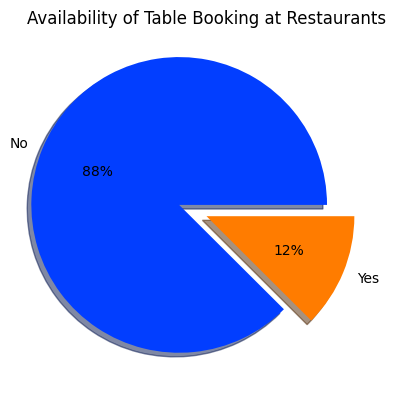

In [ ]:
# Create a pie chart showing the availability of table booking at restaurants
book_table_counts = df['book_table'].value_counts()  # Count occurrences of each table booking status
labels = book_table_counts.index  ces
myexplode = [0.2, 0]
colors = sns.color_palette('bright')

# Create the pie chart with specified parameters
plt.pie(book_table_counts, labels=labels, explode=myexplode, colors=colors, shadow=True, autopct='%.0f%%')
plt.title('Availability of Table Booking at Restaurants')
plt.show()

###Top 10 Cities with the Highest Number of Restaurants Offering Table Booking

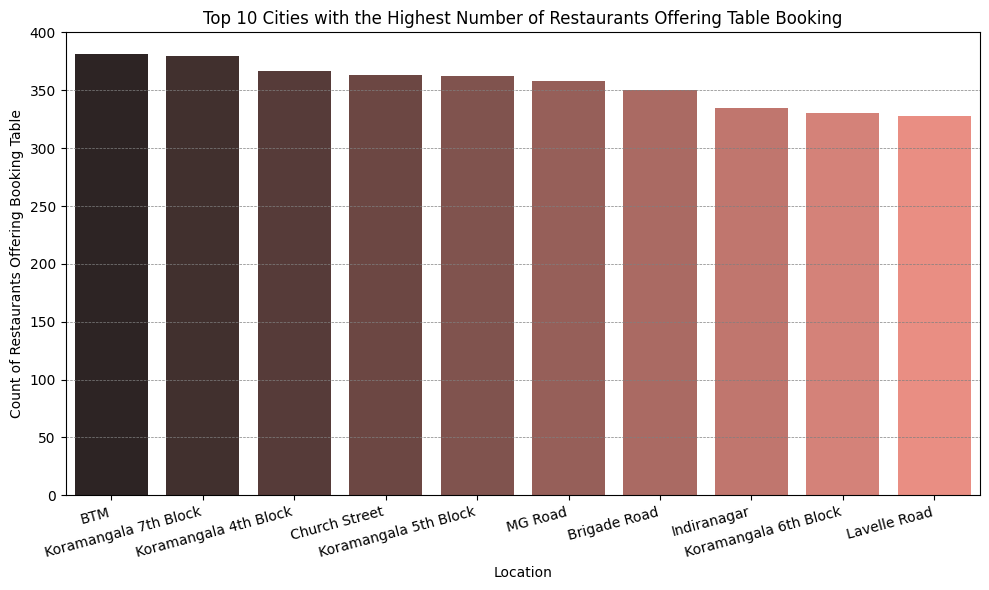

In [ ]:
# Calculate the count of restaurants offering table booking by location and select the top 10 cities
book_table = df.groupby(['location', 'book_table']).size().reset_index(name='book_table_count')  # Group by location and table booking status, then count occurrences
book_table_yes = book_table[book_table['book_table'] == 'Yes']  # Filter for locations where table booking is available
book_table_yes = book_table_yes.sort_values(by='book_table_count', ascending=False).head(10)  # Sort by count and get the top 10 locations

# Create a barplot showing the top 10 cities with the highest number of restaurants offering table booking
plt.figure(figsize=(10, 6))
sns.barplot(data=book_table_yes, x='location', y='book_table_count', hue='location', palette="dark:salmon")

# Add labels, title, and adjust x-axis labels
plt.xlabel('Location')
plt.ylabel('Count of Restaurants Offering Booking Table')
plt.title('Top 10 Cities with the Highest Number of Restaurants Offering Table Booking')
plt.xticks(rotation=15, ha='right')  # Rotate x-axis labels for better readability
plt.grid(color='grey', linestyle='--', linewidth=0.5, axis='y', zorder=0)  # Add grid lines on y-axis
plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()


##Type of Restaurants

In [ ]:
print("There are", len(df['restaurant_type'].unique()), "types of restaurants")

There are 94 types of restaurants


In [ ]:
# take the top 10 restaurant types
top_rest_type = df['restaurant_type'].value_counts().head(10)
top_rest_type

,count
restaurant_type,
Quick Bites,19132
Casual Dining,10330
Cafe,3732
Delivery,2604
Dessert Parlor,2263
"Takeaway, Delivery",2037
"Casual Dining, Bar",1154
Bakery,1141
Beverage Shop,867


<ipython-input-87-c8d0f5f6d6e0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Restaurant Type', x='Count', data=rest, palette="YlOrBr_r")


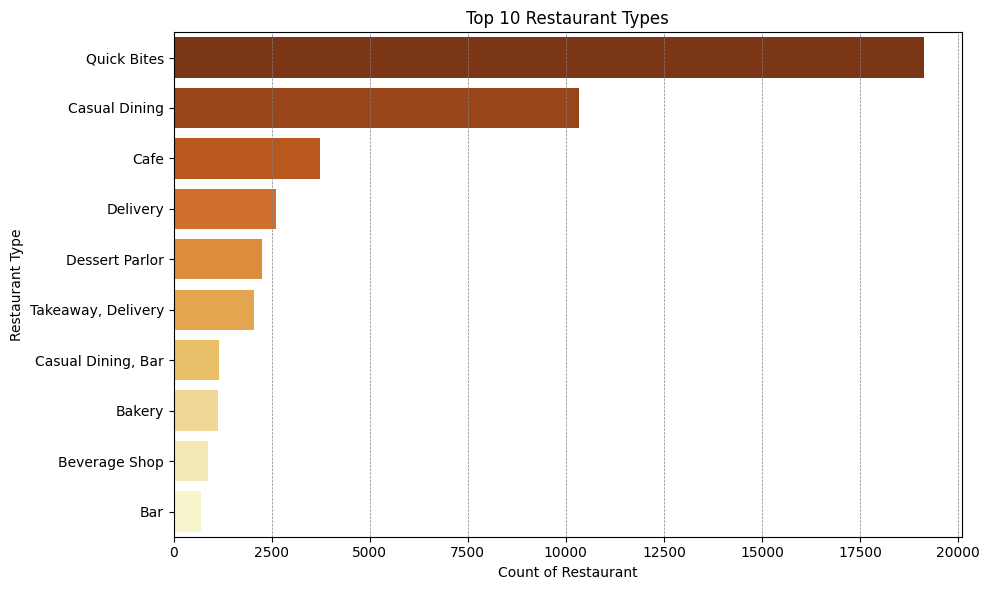

In [ ]:
# Convert the Series to DataFrame and reset the index
rest = top_rest_type.to_frame().reset_index()
rest.columns = ['Restaurant Type', 'Count']

# Add labels, grid, and title to the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y='Restaurant Type', x='Count', data=rest, palette="YlOrBr_r")
plt.ylabel("Restaurant Type")
plt.xlabel("Count of Restaurant")
plt.title("Top 10 Restaurant Types")
plt.grid(color='grey', linestyle='--', linewidth=0.5, axis='x', zorder=0)
plt.tight_layout()
plt.show()

##Type of Services

In [ ]:
df['service_type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

<ipython-input-96-a5ad124ffc5e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='service_type', data=df, order=labels, palette='Blues_r')


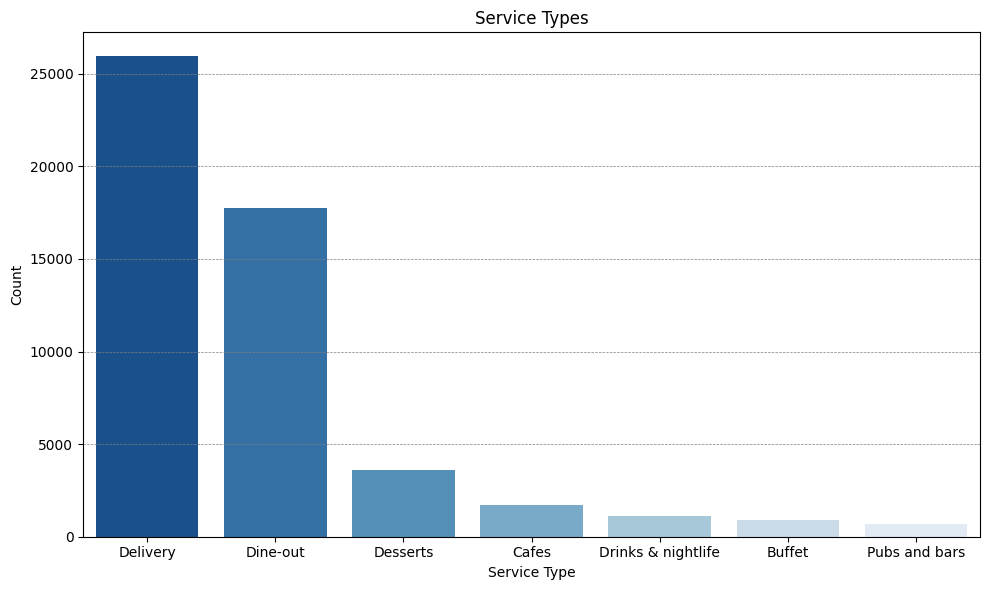

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Calculate frequency of each category
service_type_counts = df['service_type'].value_counts()
labels = service_type_counts.index

# Create the countplot
sns.countplot(x='service_type', data=df, order=labels, palette='Blues_r')

# Add labels and title
plt.xlabel("Service Type")
plt.ylabel("Count")
plt.title('Service Types')
plt.grid(color='grey', linestyle='--', linewidth=0.5, axis='y', zorder=0)
plt.tight_layout()
plt.show()

###Service Types in Each City

In [ ]:
service_type_counts = df.groupby(['location', 'service_type']).size().reset_index(name='service_type_count')
service_type_counts

,location,service_type,service_type_count
0,BTM,Buffet,39
1,BTM,Cafes,100
2,BTM,Delivery,1794
3,BTM,Desserts,196
4,BTM,Dine-out,1053
...,...,...,...
190,Whitefield,Delivery,788
191,Whitefield,Desserts,112
192,Whitefield,Dine-out,611
193,Whitefield,Drinks & nightlife,36


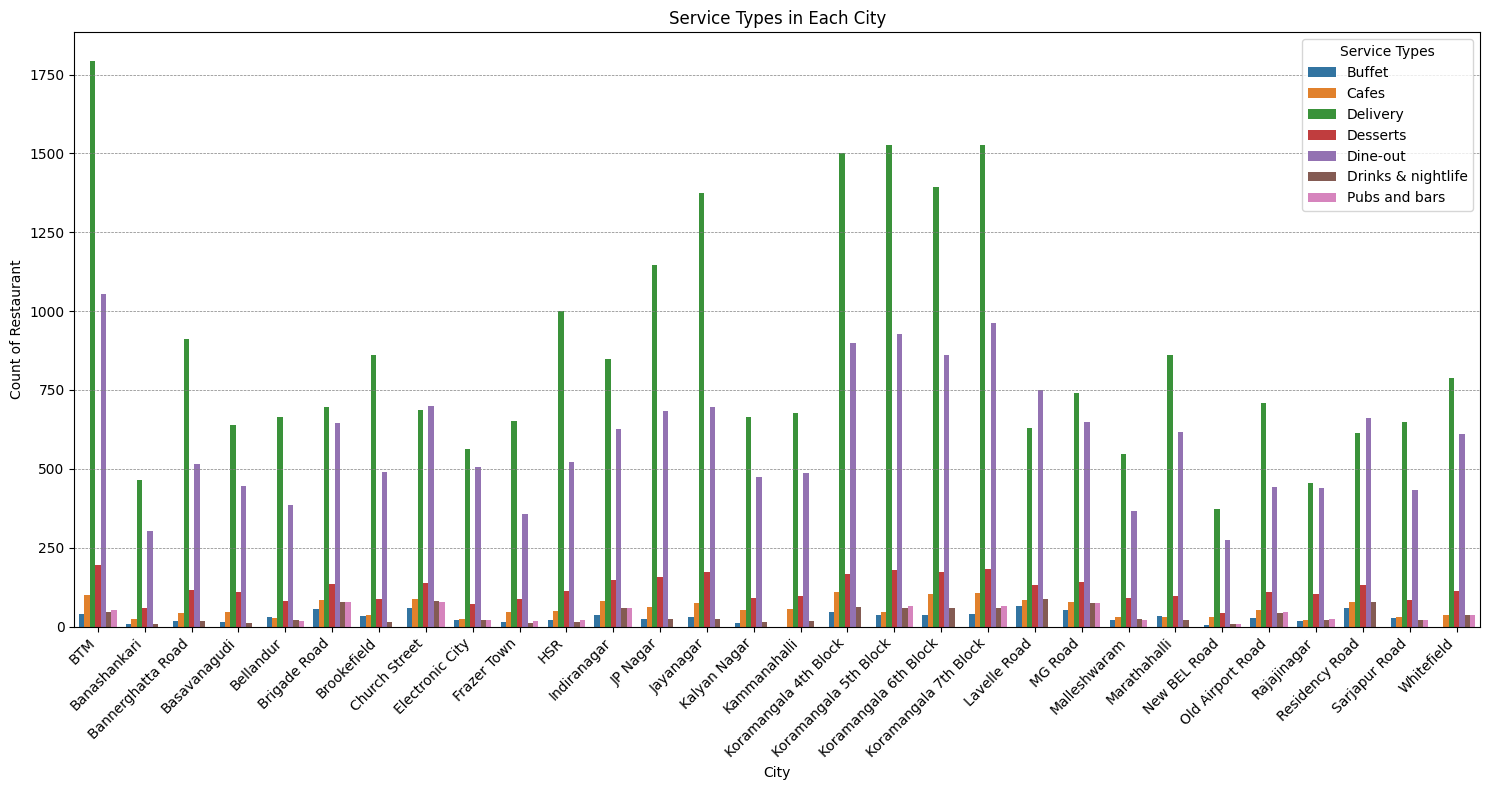

In [ ]:
# Create a barplot showing the count of each service type in each city
plt.figure(figsize=(15, 8))
sns.barplot(data=service_type_counts, x='location', y='service_type_count', hue='service_type')

# Add labels, title, and adjust x-axis labels
plt.xlabel('City')
plt.ylabel('Count of Restaurant')
plt.title('Service Types in Each City')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Service Types')  # Add legend with title
plt.tight_layout()  # Adjust layout to fit labels and title
plt.grid(color='grey', linestyle='--', linewidth=0.5, axis='y', zorder=0)  # Add grid lines on y-axis
plt.show()

##Top 10 Locations with Highest Average Rating

In [ ]:
# Calculate the average rating for each location and select the top 10 locations with the highest average rating
avg_rating_loc = df.groupby('location')['rating'].mean().reset_index()  # Compute average rating for each location
top_loc = avg_rating_loc.sort_values(by='rating', ascending=False).head(10)  # Sort by average rating and get the top 10 locations
top_loc

,location,rating
7,Church Street,3.787102
21,MG Road,3.786375
5,Brigade Road,3.784923
27,Residency Road,3.768159
20,Lavelle Road,3.764294
18,Koramangala 6th Block,3.751702
16,Koramangala 4th Block,3.748515
17,Koramangala 5th Block,3.748466
19,Koramangala 7th Block,3.747599
11,Indiranagar,3.738246


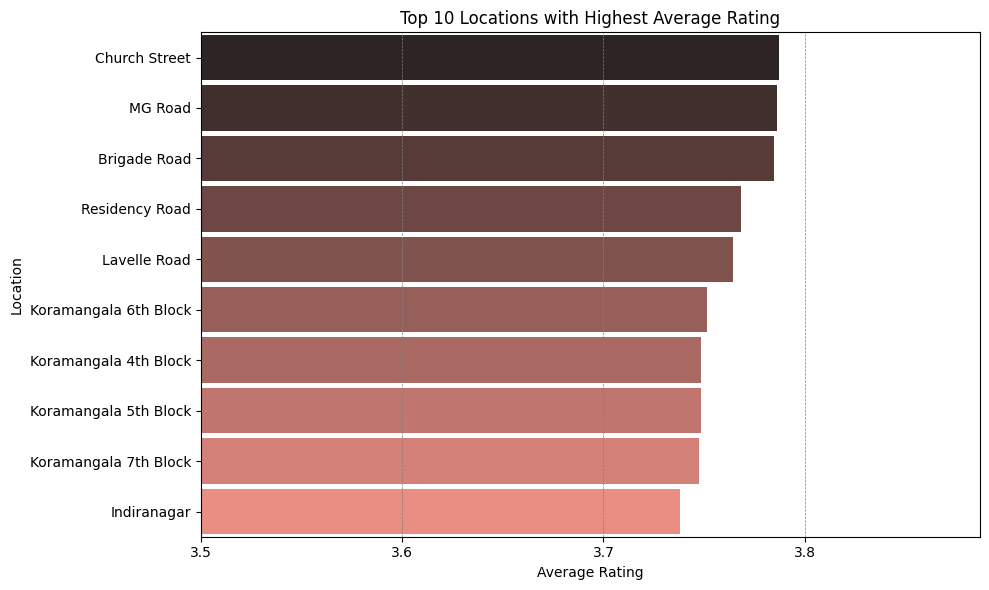

In [ ]:
# Create a horizontal barplot showing the top 10 locations with the highest average rating
plt.figure(figsize=(10, 6))
sns.barplot(y=top_loc['location'], x=top_loc['rating'], data=df, width=0.9, hue=top_loc['location'], palette='dark:salmon')

# Add labels, title, and adjust x-axis limits and ticks
plt.ylabel('Location')
plt.xlabel('Average Rating')
plt.title('Top 10 Locations with Highest Average Rating')
plt.xlim(3.5, top_loc['rating'].max() + 0.1)  # Set x-axis limits
plt.xticks(np.arange(3.5, top_loc['rating'].max() + 0.1, step=0.1))  # Set x-axis ticks
plt.grid(color='grey', linestyle='--', linewidth=0.5, axis='x', zorder=0)  # Add grid lines on x-axis
plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()


##Average Cost for Two People for Each Service Type

In [ ]:
df['cost_for_two'].value_counts()

,count
cost_for_two,
300.0,7576
400.0,6562
500.0,4980
200.0,4857
600.0,3714
...,...
60.0,1
5000.0,1
3700.0,1


In [ ]:
# Calculate the average cost for two people by service type and sort by average cost in descending order
avg_cost = df.groupby('service_type')['cost_for_two'].mean().reset_index(name='avg_cost_for_two').sort_values(by='avg_cost_for_two', ascending=False)
avg_cost

,service_type,avg_cost_for_two
5,Drinks & nightlife,1437.515273
6,Pubs and bars,1318.075874
0,Buffet,1297.289963
1,Cafes,626.963802
4,Dine-out,591.818698
2,Delivery,465.034782
3,Desserts,393.405452


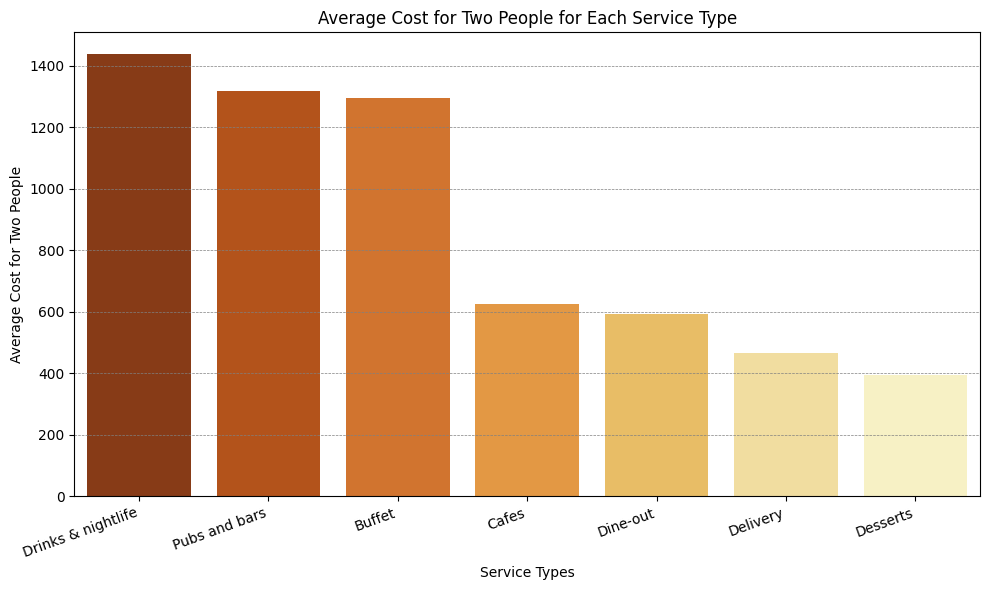

In [ ]:
# Create a barplot of average cost for two people by service type
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_cost, x='service_type', y='avg_cost_for_two', hue='service_type', palette='YlOrBr_r')

# Add labels, title, and grid
plt.xlabel('Service Types')
plt.ylabel('Average Cost for Two People')
plt.title('Average Cost for Two People for Each Service Type')
plt.xticks(rotation=20, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels and titles
plt.grid(color='grey', linestyle='--', linewidth=0.5, axis='y', zorder=0)
plt.show()